In [12]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

In [13]:
train_scaled = train_input / 255.0
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, train_target, test_size=0.2)

In [18]:
def model_fn(a_layer=None):
    model = keras.Sequential()
    model.add(keras.layers.Flatten(input_shape=(28, 28)))
    model.add(keras.layers.Dense(100, activation='relu'))
    
    if a_layer:
        model.add(a_layer)
    
    model.add(keras.layers.Dense(10, activation='softmax'))
    
    return model

In [23]:
model = model_fn()

C:\Users\2-12\Desktop\DMF\ML\venv\Lib\site-packages\keras\src\layers\reshaping\flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


In [36]:
model.compile(loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target))

In [34]:
history.history.keys()

dict_keys(['accuracy', 'loss', 'val_accuracy', 'val_loss'])

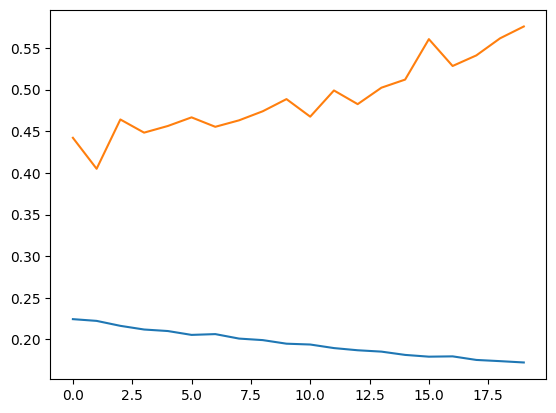

In [37]:
import matplotlib.pyplot as plt

plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
# plt.plot(history.history['accuracy'])
plt.show()

In [38]:
model = model_fn(keras.layers.Dropout(0.3))
model.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┓
┃ Layer (type)                        ┃ Output Shape               ┃        Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)                 │ (None, 784)                │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_2 (Dense)                     │ (None, 100)                │         78,500 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dropout (Dropout)                   │ (None, 100)                │              0 │
├─────────────────────────────────────┼────────────────────────────┼────────────────┤
│ dense_3 (Dense)                     │ (None, 10)                 │          1,010 │
└─────────────────────────────────────┴────────────────────────────┴────────────────┘

 Total params: 79,510 (310.59 KB)

 Trainable params: 79,510 (310.59 KB)

 Non-trainable params: 0 (0.00 B)

In [48]:
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint_cb = keras.callbacks.ModelCheckpoint('best_model.keras', save_best_only=True) # 제일 좋은 모델 하나만 저장
model.fit(train_scaled, train_target, epochs=20, verbose=0, validation_data=(val_scaled, val_target), callbacks=[checkpoint_cb])

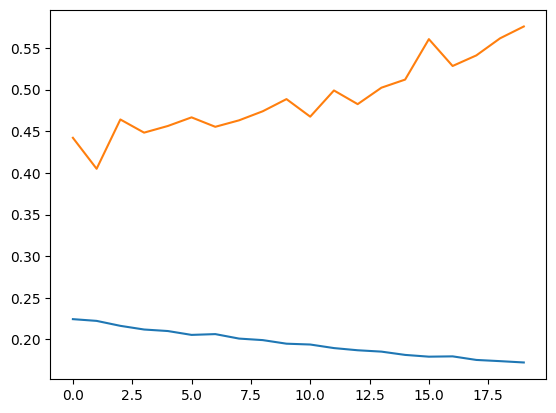

In [49]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.show()

In [44]:
model.save_weights('model.weights.h5')

In [46]:
model.save('mymodel.keras')